In [1]:
# Алексеев Д.П. (DSU-4,FEML-8)
# Домашнее задание к лекции «Деревья решений» (#7).

# Задание:
# См. материалы к занятию.
# Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) 
# и построить модель. По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».

# А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston

1. Построение модели линейной регрессии.

In [3]:
# загрузим датасет boston house-prices
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# целевая переменная
target = data['MEDV']
target[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [6]:
# для улучшения качества предсказаний нормализуем признаки ['INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 
# StandardScaler'ом, # а также округлим 'RM' до целых (кол-во комнат не может быть дробной величиной)

data['RM'] = data['RM'].apply(lambda x: round(x,0))

scaler = StandardScaler()
data[['INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']] = scaler.fit_transform(data[['INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

In [7]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,-1.287909,0,0.538,7.0,-0.120013,0.140214,1,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,0.02731,0.0,-0.593381,0,0.469,6.0,0.367166,0.557160,2,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,0.02729,0.0,-0.593381,0,0.469,7.0,-0.265812,0.557160,2,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,0.03237,0.0,-1.306878,0,0.458,7.0,-0.809889,1.077737,3,-1.106115,0.113032,0.416163,-1.361517,33.4
4,0.06905,0.0,-1.306878,0,0.458,7.0,-0.511180,1.077737,3,-1.106115,0.113032,0.441052,-1.026501,36.2


In [8]:
# Будем использовать функцию для построения модели линейной регрессии, оценки качества и вывода коэфф-тов регрессии
def get_linear(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)  
    model.fit(X_train, y_train)
    
    print("model.score (коэфф-т детерминации) на тестовой выборке: ", model.score(X_test, y_test))
    print("Свободный член:", model.intercept_)
    print("Коэффициенты при признаках:", model.coef_)

    return 

In [9]:
# построим линейную регрессию на нормализованном датасете и выведем её параметры
set_1 = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
get_linear(set_1, target)

model.score (коэфф-т детерминации) на тестовой выборке:  0.7248493104687765
Свободный член: 6.513005019829233
Коэффициенты при признаках: [ -0.14060518   0.03829075   0.29985757   3.04020048 -15.62094705
   3.51923311  -0.04750935  -2.83233583   0.25716843  -1.4217378
  -2.05217215   1.10028395  -4.17779502]


2. Построение дерева решений.

In [10]:
# используем для построения дерева решений то же самое разделение на трейн/тест-выборки, что и при построении модели регрессии
# (для сопоставимости результатов):
X_train, X_test, y_train, y_test = train_test_split(set_1, target, test_size=0.3, random_state=42)

In [11]:
# построим исходное дерево решений (до оптимизации параметров) и рассчитаем его исходное качество:
np.random.seed(42) #зафиксируем seed для повторяемости результатов
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)
model_tree.score(X_test, y_test)

0.787558536764671

Мы видим, что исходное качество предсказаний дерева решений (0.787558536764671) получилось выше, 
чем у линейной регрессии (0.7248493104687765).
Попробуем оптимизировать основные параметры построения дерева 
(список основных параметров взят с https://habr.com/ru/company/ods/blog/322534/), такие как:
1) max_depth – максимальная глубина дерева;
2) max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве;
3) min_samples_leaf – минимальное число объектов в листе.

In [12]:
# 1) max_depth – максимальная глубина дерева, зададим например от 1 до 29 включительно
np.random.seed(42)
for depth in range(1,30):
    model_tree_opt = DecisionTreeRegressor(max_depth = depth)
    model_tree_opt.fit(X_train, y_train) #тренируем
    print("Глубина дерева: ", depth, ". Score: ", model_tree_opt.score(X_test, y_test)) #проверяем

Глубина дерева:  1 . Score:  0.3523891131431025
Глубина дерева:  2 . Score:  0.6286138507175145
Глубина дерева:  3 . Score:  0.7349276293208287
Глубина дерева:  4 . Score:  0.7756021720615456
Глубина дерева:  5 . Score:  0.7866409325241195
Глубина дерева:  6 . Score:  0.8094033386591298
Глубина дерева:  7 . Score:  0.8055775585265211
Глубина дерева:  8 . Score:  0.794885748987709
Глубина дерева:  9 . Score:  0.7691868799099726
Глубина дерева:  10 . Score:  0.7749928918190354
Глубина дерева:  11 . Score:  0.7984983712922809
Глубина дерева:  12 . Score:  0.7861670346399331
Глубина дерева:  13 . Score:  0.754113830727569
Глубина дерева:  14 . Score:  0.7818798301973642
Глубина дерева:  15 . Score:  0.794343336355111
Глубина дерева:  16 . Score:  0.7839988939342343
Глубина дерева:  17 . Score:  0.7685415765555526
Глубина дерева:  18 . Score:  0.7686829348875706
Глубина дерева:  19 . Score:  0.7561495493019064
Глубина дерева:  20 . Score:  0.7779881204560408
Глубина дерева:  21 . Score:  0.

Мы видим, что наилучшие предсказания получаются при Глубине дерева=6 (Score:  0.8094033386591298).

Попробуем теперь поэкспериментировать со следующим параметром:
2) max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве;

Всего у нас 13 входящих признаков, попробуем задать весь диапазон и посмотреть, что получится:

In [13]:
np.random.seed(42)
for feature in range(1,14):
    model_tree_opt = DecisionTreeRegressor(max_features = feature)
    model_tree_opt.fit(X_train, y_train) 
    print("Количество признаков: ", feature, ". Score: ", model_tree_opt.score(X_test, y_test)) 

Количество признаков:  1 . Score:  0.46945037733890316
Количество признаков:  2 . Score:  0.5214405320747594
Количество признаков:  3 . Score:  0.6977288660055386
Количество признаков:  4 . Score:  0.8129496934437987
Количество признаков:  5 . Score:  0.6681446985791692
Количество признаков:  6 . Score:  0.7594258980113834
Количество признаков:  7 . Score:  0.8168592852712964
Количество признаков:  8 . Score:  0.6651092024854617
Количество признаков:  9 . Score:  0.7576732919188851
Количество признаков:  10 . Score:  0.8111635362019225
Количество признаков:  11 . Score:  0.7790418423726109
Количество признаков:  12 . Score:  0.7606443344887879
Количество признаков:  13 . Score:  0.771068146845481


Мы видим, что наилучшие предсказания получаются при Количестве признаков=7 (Score: 0.8168592852712964).

Попробуем теперь поэкспериментировать со следующим параметром: 
3) min_samples_leaf – минимальное число объектов в листе.

In [14]:
np.random.seed(42)
for samples_leaf in range(1,11):
    model_tree_opt = DecisionTreeRegressor(min_samples_leaf = samples_leaf)
    model_tree_opt.fit(X_train, y_train) 
    print("Мин.число объектов в листе: ", samples_leaf, ". Score: ", model_tree_opt.score(X_test, y_test)) 

Мин.число объектов в листе:  1 . Score:  0.787558536764671
Мин.число объектов в листе:  2 . Score:  0.6922468828849783
Мин.число объектов в листе:  3 . Score:  0.7683939301659417
Мин.число объектов в листе:  4 . Score:  0.7303249722211451
Мин.число объектов в листе:  5 . Score:  0.7536896575344092
Мин.число объектов в листе:  6 . Score:  0.7178755656161623
Мин.число объектов в листе:  7 . Score:  0.7399067506762893
Мин.число объектов в листе:  8 . Score:  0.72270490250264
Мин.число объектов в листе:  9 . Score:  0.7165717114987442
Мин.число объектов в листе:  10 . Score:  0.7274610861828139


Мы видим, что наилучшие предсказания получаются при Мин.числе объектов в листе=1 (Score: 0.787558536764671).

Попробуем теперь построить модель и дерево решений с отобранными параметрами, оптимальными для данного набора вх.признаков: 
- max_depth = 6
- max_features = 7
- min_samples_leaf = 1

In [15]:
np.random.seed(42)
model_tree_best = DecisionTreeRegressor(max_depth = 6, max_features = 7, min_samples_leaf = 1)
model_tree_best.fit(X_train, y_train) 
print("Best_Score: ", model_tree_best.score(X_test, y_test)) 

Best_Score:  0.8287980509643953


Мы видим, что качество предсказаний дерева удалось улучшить по сравнению с базовым вариантом и по сравнению с лин.регрессией:
- Best_Score (tree): 0.8287980509643953
- Base_Score (tree): 0.787558536764671
- Base_Score (regression): 0.7248493104687765    

Попробуем теперь нарисовать дерево решений (в наилучшем варианте 'model_tree_best'), пользуясь встроенной библиотекой tree

[Text(152.15464285714285, 201.90857142857143, 'X[12] <= -0.671\nmse = 87.897\nsamples = 354\nvalue = 23.016'),
 Text(78.31928571428571, 170.84571428571428, 'X[5] <= 7.5\nmse = 78.566\nsamples = 112\nvalue = 32.312'),
 Text(41.85, 139.78285714285715, 'X[12] <= -1.226\nmse = 45.01\nsamples = 91\nvalue = 29.531'),
 Text(23.914285714285715, 108.72, 'X[2] <= 0.163\nmse = 75.351\nsamples = 12\nvalue = 39.367'),
 Text(19.13142857142857, 77.65714285714284, 'X[2] <= -0.836\nmse = 28.225\nsamples = 8\nvalue = 34.05'),
 Text(9.565714285714286, 46.59428571428572, 'X[4] <= 0.403\nmse = 13.324\nsamples = 5\nvalue = 37.2'),
 Text(4.782857142857143, 15.531428571428563, 'mse = 0.0\nsamples = 1\nvalue = 44.0'),
 Text(14.348571428571429, 15.531428571428563, 'mse = 2.205\nsamples = 4\nvalue = 35.5'),
 Text(28.697142857142858, 46.59428571428572, 'X[5] <= 6.5\nmse = 8.96\nsamples = 3\nvalue = 28.8'),
 Text(23.914285714285715, 15.531428571428563, 'mse = 0.0\nsamples = 1\nvalue = 24.8'),
 Text(33.480000000000

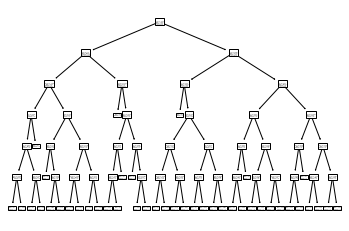

In [23]:
from sklearn import tree
tree.plot_tree(model_tree_best)

Штатной библиотекой (tree) получилось не очень красиво, попробуем библиотеку graphviz

In [31]:
# мне потребовалось скачать и установить пакет Graphviz с сайта разработчика (https://graphviz.org/download/)
# и прописать потом "PATH", иначе не находил
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

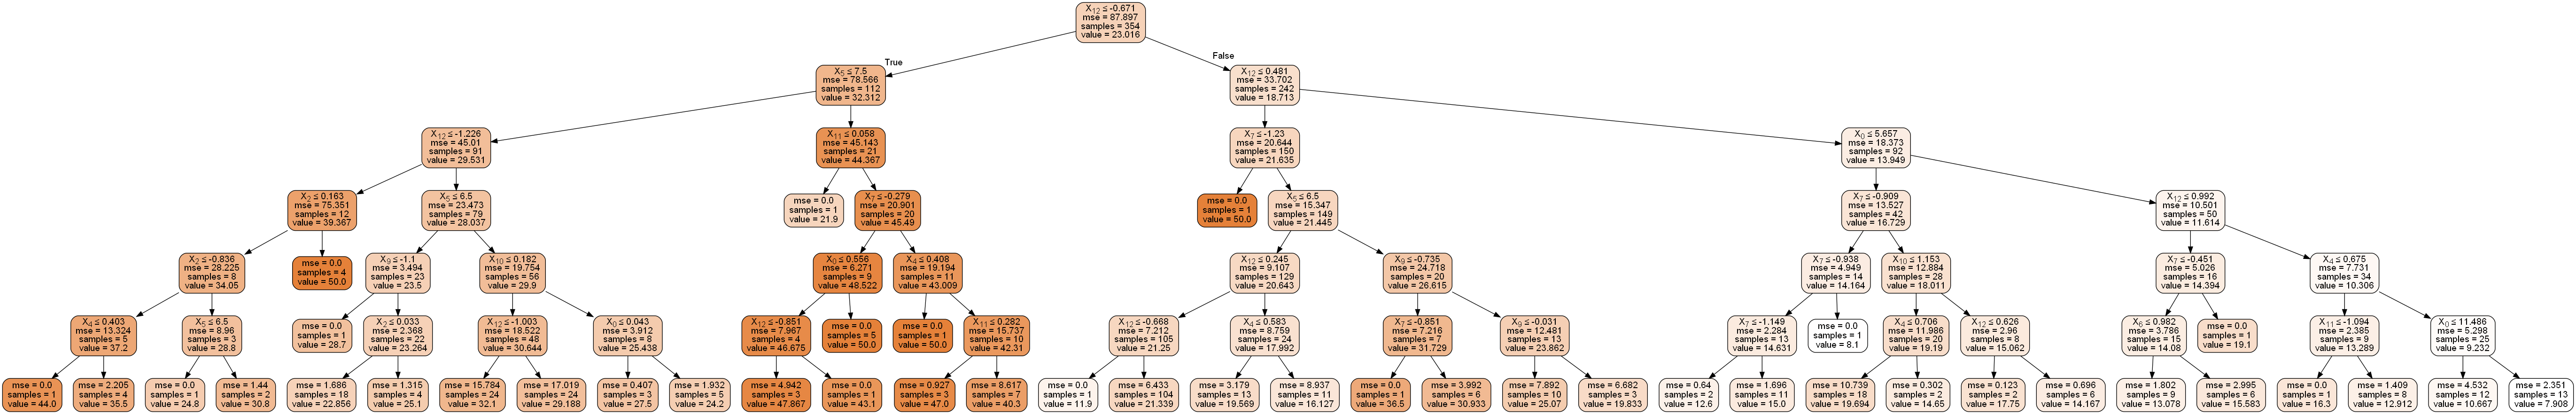

In [30]:
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model_tree_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Если сохранить получившийся png-файл на диск, то можно увеличить и рассмотреть в любом графическом редакторе))

На мой взгляд, получилось неплохо, но из-за большого количества признаков дерево немного перегружено.

На дереве выводятся:
- условие ветвления по значению конкретного признака
- значение MSE
- количество сэмплов
- значение целевой переменной. 

Возможно, как вариант дальнейшей оптимизации, стоит уменьшить макс.количество входящих признаков с 7-и до 4-х, по идее совсем немного потеряв в качестве предсказаний:
-Количество признаков:4 -> Score:0.8129496934437987.  
-Количество признаков:7 -> Score:0.8168592852712964.